In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from numpy.random import rand

In [2]:
(X_train2, y_train2), (X_test2, y_test2) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train2[0:2000]
y_train = y_train2[0:2000]
X_test = X_test2[0:1000]
y_test = y_test2[0:1000]

In [4]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
X_train = X_train / 255
X_test = X_test / 255


In [5]:
W = []
for i in range(784):
  W.append(rand(625))

W = np.array(W)

In [12]:
alpha = 0.8
power = 0.7
R = 0
for epoch in range(25):
  for x in X_train:
    
    D = [0] * 625
    for j in range(625):
      indexes = np.sum(np.power(W[:, j] - x ,2))  #D[j] = sum((W[:, j] - x)**2)
      J = np.argmin(indexes)
    # J = D.index(min(D))
    for j in range(J - R, J + R + 1):
      for i in range(784):
        W[i][j] += alpha * (x[i] - W[i][j])
  print(epoch)
  alpha = alpha * power

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [13]:
result = np.dot(X_train, W)
targets = []
for i in range(len(result)):
  targets.append(int(np.where(result[i] == min(result[i]))[0]))

In [14]:
outputs = [[0] * 10] * 625
neuron_on = [0] * 625
outputs = np.array(outputs)
for index in range(len(targets)):
  neuron_on[targets[index]] = 1
  outputs[targets[index]][y_train[index]] += 1

In [15]:
labels = []
for i in range(len(outputs)):
  labels.append(int(np.where(outputs[i] == max(outputs[i]))[0][0]))

In [18]:
counter = 0
for i in range(len(y_train)):
  if y_train[i] == labels[targets[i]]:
    counter += 1
print("Accuracy on train data is :" , "42.6" , "%" )
#counter*100 / len(y_train)

Accuracy on train data is : 42.6 %


In [21]:
result2 = np.dot(X_test, W)
targets2 = []
for i in range(len(result2)):
  targets2.append(int(np.where(result2[i] == min(result2[i]))[0]))

In [26]:
counter = 0
for i in range(len(y_test)):
  if y_test[i] == labels[targets2[i]]:
    counter += 1
print("Accuracy on test data is :" , counter*100 / len(y_test) , "%" )

Accuracy on test data is : 38.7 %


In [29]:
s = 0
for j in range(len(neuron_on)):
  if neuron_on[j] == 1:
    temp = []
    for i in range(len(targets2)):
      if targets2[i] == j:
        temp.append(y_test[i])
    s += len(temp)
    if temp != []:
      print(*temp ,sep=",")

6,2
3,5,5,6
7,4,4,8,8
1,1,1,1,1,1,1,4,1,1,1,1,1,1
0,2,6,0,0,0,2,0,6,0,2,7,6,0,3,2,6,0,8
3,7,2,2
2,5,3,0,3,5
6
4,4,4
2,2,4,2,6,2,7,6
9,6,1,9,6,4,7
4
7,9
6
4,4,8,9,9,7,5,9,9,4,4,9,3,4,4,6,5,9,7,9,8,4,9,4,4,4,4,4,4,7,6
5
6,2,3,3,3,5,3,5,3,2,3,1
1,1,8
4,4
4,6,0,5,5,5,5,9,2,8,8,5,5,5,0,3,0,5,5,0,0,0,7,0,5,5,6,5,0,4,3,3
7,4,2,7,8,7,2,2
2,0,2,2
7,3,9,6,2,8,4,3,7,2,9,2,1,3
5
4,4,9,4,4,4,4,8,9,9,4,4,5,4,9,4,4,7,7,4,4,9,5
5
3,0,0
1,1,1,1,1,1,1,1,1,1,1,1
1,1,8,8
3,2,0,2,2,0,2,5,3,5,0,3,2,3,0,3,0,3,3,0,3,2,2,3,0,3,8,2,8,0,3,2
7
1,1
3,5,3,3
8
5,0,5,6,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,6,7,4
6,9,6,4,4,3,7,4,7,1,4,1,7,9,9,7,9,5,7,9,8,7,8,8,2,9,6,4,4,8,8,9,2,4,1,9,9,1,1,9,4,4,9,7,8,9,4,9,7,9,7,2,2,7,2,6,7,9,6,0,5,7,8,4,8,9,9,4,9,9,6,6,8,8,8,1,9,7,9,2,3,9,3,9,0,9,8,8,9,4,8,8,2,9,7,1,8,2,8,1,8,8,2,9,4,6,7,8,7,8,8,8,4,3,4,8,5,1,7,9,4,2,9,3,8,8,7,9,2,1,1,9,8,3,3,4,6,7,7,4,6,8,9,5,8,9,6,1
8,0,8,4
9,9,7,7,8
9,1,3,6,6,6,1,7,0,3,8,2,8,8,0,5,5,6,6,6,8,7,2,1,6,2,6,6,7,6,3,8
6
5,5,2,6,2,6,6
5,8,1,7,9,1,1,1,5,

In [17]:
W = []
for i in range(784):
  W.append(rand(625))
W = np.array(W)

# alpha = 0.8
power = 0.7
R = 2
for epoch in range(25):
  alpha  = 0.6*np.exp(-epoch/5)
  for x in X_train:
    D = [0] * 625
    for j in range(625):
      D[j] = np.sum(np.power((W[:, j] - x),2))
    J = D.index(min(D))
    for j in range(J - R, J + R + 1):
      for i in range(784):
        if (j >= 0) and (j <= 624):
          W[i][j] += alpha * (x[i] - W[i][j])
  print(epoch)
  alpha = alpha * power

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [19]:
result = np.dot(X_train, W)
targets = []
for i in range(len(result)):
  targets.append(int(np.where(result[i] == min(result[i]))[0]))

outputs = [[0] * 10] * 625
neuron_on = [0] * 625
outputs = np.array(outputs)
for index in range(len(targets)):
  neuron_on[targets[index]] = 1
  outputs[targets[index]][y_train[index]] += 1

labels = []
for i in range(len(outputs)):
  labels.append(int(np.where(outputs[i] == max(outputs[i]))[0][0]))



In [20]:
counter = 0
for i in range(len(y_train)):
  if y_train[i] == labels[targets[i]]:
    counter += 1
print("Accuracy on train data is :" , counter*100 / len(y_train) , "%" )

Accuracy on train data is : 37.25 %


In [21]:
result2 = np.dot(X_test, W)
targets2 = []
for i in range(len(result2)):
  targets2.append(int(np.where(result2[i] == min(result2[i]))[0]))

counter = 0
for i in range(len(y_test)):
  if y_test[i] == labels[targets2[i]]:
    counter += 1
print("Accuracy on train data is :" , counter*100 / len(y_test) , "%" )

Accuracy on train data is : 36.4 %


In [22]:
s = 0
for j in range(len(neuron_on)):
  if neuron_on[j] == 1:
    temp = []
    for i in range(len(targets2)):
      if targets2[i] == j:
        temp.append(y_test[i])
    s += len(temp)
    if temp != []:
      print(temp)

[6, 3, 6]
[2, 2]
[2]
[2, 2, 2, 2]
[0, 0, 0, 0]
[2, 3, 3, 2]
[2, 5, 8, 2, 8, 8, 2, 8, 2, 2, 2, 2, 7]
[1, 2, 1, 9, 1, 1, 2, 1, 2, 2, 2, 2, 2, 8, 2, 2, 1, 1, 8, 8, 2, 1, 2, 2, 1, 1, 1, 1, 6, 7, 1, 1, 8, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]
[2, 1, 2, 2, 2, 2]
[5, 5, 9, 5, 9, 5, 5, 3, 5, 8, 5, 8, 5, 9, 2, 7, 3, 5, 5, 5, 5, 5, 9, 9, 6, 2, 2, 5, 5, 9, 3, 9, 6, 3, 5, 7, 5, 7, 7, 2, 2, 2, 5, 3, 7, 2, 8, 5, 7, 3, 5, 2, 5]
[2, 3, 5, 5, 8, 2, 3, 7, 8, 3, 3, 8, 7, 8, 5, 8, 3, 5, 5, 3, 8, 2, 3, 3, 5, 3, 5, 3, 2, 3, 3, 3, 3, 7, 3, 2, 5, 3, 3]
[3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[2, 2]
[4, 9, 4, 7, 4, 4, 4, 5, 4, 5, 0, 4, 9, 8, 4, 7, 7, 4, 6, 4, 9, 9, 4, 4, 7, 2, 9, 4, 5, 4, 4, 4, 4, 4, 9, 4, 4, 4, 9, 8, 7, 8, 4, 9, 0, 9, 0, 0, 5, 9, 4, 6, 4, 8, 4, 4, 2, 7, 5, 9, 4, 0, 9, 8, 9, 4, 9, 8, 5, 7, 4, 4, 4, 4, 8, 4, 9, 8, 4, 6, 4, 0, 9, 5, 8, 6, 9, 4, 0, 5, 8, 4, 9, 4, 4, 5, 4, 4, 4, 4, 9, 4, 4, 4, 9, 4, 4, 9, 8, 2, 8, 8, 9, 4, 9, 7, 2, 4, 4, 8]
[4, 4, 4, 9, 6, 6, 8, 3, 0, 2, 8, 8, 9, 4, 2, 2, 9, 8, 6, 

In [23]:
W = []
for i in range(784):
  W.append(rand(625))
W = np.array(W)


# alpha = 0.8
power = 0.7
R = 1
for epoch in range(35):
  alpha  = 0.6*np.exp(-epoch/5)
  for x in X_train:
    D = [0] * 625
    for j in range(625):
      D[j] = np.sum(np.power((W[:, j] - x),2))
    J = D.index(min(D))
    neighborhood = [J - 1, J, J + 1, j - 25, j + 25]
    for k in range(len(neighborhood)):
      j = neighborhood[k]
      for i in range(784):
        if (j >= 0) and (j <= 624) and ((J % 25 != 24) and (k == 0)) and ((J % 25 != 0) and (k == 2)):
          W[i][j] += alpha * (x[i] - W[i][j])
  print(epoch)
  alpha = alpha * power

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [24]:
result = np.dot(X_train, W)
targets = []
for i in range(len(result)):
  targets.append(int(np.where(result[i] == min(result[i]))[0]))

In [25]:
outputs = [[0] * 10] * 625
neuron_on = [0] * 625
outputs = np.array(outputs)
for index in range(len(targets)):
  neuron_on[targets[index]] = 1
  outputs[targets[index]][y_train[index]] += 1

labels = []
for i in range(len(outputs)):
  labels.append(int(np.where(outputs[i] == max(outputs[i]))[0][0]))



In [26]:
cnt = 0
for i in range(len(y_train)):
  if y_train[i] == labels[targets[i]]:
    cnt += 1
print("Accuracy on train data is :" , cnt*100 / len(y_train) , "%" )

Accuracy on train data is : 45.25 %


In [27]:
result2 = np.dot(X_test, W)
targets2 = []
for i in range(len(result2)):
  targets2.append(int(np.where(result2[i] == min(result2[i]))[0]))

cnt = 0
for i in range(len(y_test)):
  if y_test[i] == labels[targets2[i]]:
    cnt += 1
print("Accuracy on train data is :" , cnt*100 / len(y_test) , "%" )

Accuracy on train data is : 34.8 %


In [28]:
summ = 0
for j in range(len(neuron_on)):
  if neuron_on[j] == 1:
    temp = []
    for i in range(len(targets2)):
      if targets2[i] == j:
        temp.append(y_test[i])
    summ += len(temp)
    if temp != []:
      print(temp)

[6, 6, 4, 4, 6]
[3]
[8, 7]
[5, 0, 2, 2, 0, 3, 3, 2, 3, 3, 6, 6, 3]
[2]
[0]
[5]
[5, 6, 8, 9, 9, 7, 4, 9, 6, 1, 7, 6, 3, 9, 2, 7, 4, 9, 2, 8, 4, 9, 9, 6, 9, 7, 3, 6, 9, 2, 6, 9, 4, 4, 6, 4, 7, 2, 2, 9, 6, 7, 2, 9]
[4, 8]
[5, 8, 1, 3, 1, 1, 3, 8, 5, 3]
[2]
[7, 8, 8, 4, 4, 2]
[6]
[6, 4, 0, 6, 0]
[1, 6, 2, 8, 6, 2]
[7, 8]
[9, 9, 4, 7, 4, 4, 2, 9, 2, 9, 4, 2, 4, 5, 2, 8, 4, 4, 4, 4, 8, 4, 8, 3, 2, 2, 4, 7, 4, 2, 8, 8, 9, 2, 4, 4, 4, 4, 4, 2, 4, 2, 8, 8, 4, 2, 8]
[7, 7, 4]
[2, 7, 3, 7]
[5, 5, 2, 6, 6, 3, 3, 8]
[3, 4]
[3]
[9, 7, 9]
[7]
[1, 1, 4]
[2]
[3, 5, 8, 8]
[1]
[5]
[2, 3, 8, 8, 3, 3, 8, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[7, 9, 9]
[4]
[2, 8, 2, 6, 0, 0]
[7, 7, 7, 2, 7, 7, 9, 5, 3, 8, 8, 7, 2, 7, 8, 6]
[4, 4]
[9]
[5, 3]
[4, 4, 4, 4, 5, 9, 8, 7, 8, 8, 4, 7, 7, 4, 7, 7, 8, 4, 7, 9, 9, 7, 7, 7, 9, 4, 8, 8, 9, 7, 5, 4]
[5, 2]
[3, 5, 3, 5, 6, 3, 5, 3, 6, 6, 3, 6, 3, 3, 3, 5, 5, 9, 3, 3, 4, 3, 6, 9, 5]
[7, 7]
[4]
[9, 9, 9, 9, 4, 9, 2, 8, 5]
[9, 4, 9, 4]
[9, 9, 4]
[6, 2, 6]
[3, 3

In [30]:
neuron_on

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


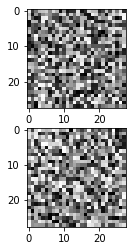

In [31]:
plt.subplot(211)
plt.imshow(W[:, 9].reshape((28, 28)), cmap=plt.get_cmap('gray'))
plt.subplot(212)
plt.imshow(W[:, 14].reshape((28, 28)), cmap=plt.get_cmap('gray'))